In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

print("PROJECT_DIR", PROJECT_DIR := pathlib.Path.cwd())
print("DATA_DIR", DATA_DIR := PROJECT_DIR / "data")

PROJECT_DIR /home/uzunb/Projects/municipality-bus-utilization-forecasting
DATA_DIR /home/uzunb/Projects/municipality-bus-utilization-forecasting/data


In [2]:
# Read the data
df = pd.read_csv(DATA_DIR / 'municipality_bus_utilization.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('timestamp')
df

municipality_id  usage  total_capacity
timestamp                                                  
2017-06-04 07:59:42                9    454            1332
2017-06-04 07:59:42                8    556            2947
2017-06-04 07:59:42                4   1090            3893
2017-06-04 07:59:42                0    204            2813
2017-06-04 07:59:42                7    718            2019
...                              ...    ...             ...
2017-08-19 16:30:35                2    548             697
2017-08-19 16:30:35                8   1193            2947
2017-08-19 16:30:35                7   1354            2019
2017-08-19 16:30:35                6   1680            3113
2017-08-19 16:30:35                3   1189            1930

[13070 rows x 3 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13070 entries, 2017-06-04 07:59:42 to 2017-08-19 16:30:35
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   municipality_id  13070 non-null  int64
 1   usage            13070 non-null  int64
 2   total_capacity   13070 non-null  int64
dtypes: int64(3)
memory usage: 408.4 KB


In [4]:
df.describe()

municipality_id         usage  total_capacity
count     13070.000000  13070.000000    13070.000000
mean          4.500000    876.002984     1972.800000
std           2.872391    679.287109     1144.074782
min           0.000000     11.000000      397.000000
25%           2.000000    403.000000      697.000000
50%           4.500000    692.000000     1974.500000
75%           7.000000   1190.000000     2947.000000
max           9.000000   3508.000000     3893.000000

In [5]:
df.isnull().sum()

municipality_id    0
usage              0
total_capacity     0
dtype: int64

In [6]:
df['municipality_id'].value_counts().sort_index()

municipality_id
0    1307
1    1307
2    1307
3    1307
4    1307
5    1307
6    1307
7    1307
8    1307
9    1307
Name: count, dtype: int64

In [7]:
df.groupby('municipality_id')['total_capacity'].mean().sort_values(ascending=False)

municipality_id
4    3893.0
6    3113.0
8    2947.0
0    2813.0
7    2019.0
3    1930.0
9    1332.0
2     697.0
5     587.0
1     397.0
Name: total_capacity, dtype: float64

In [8]:
grouped_df = df.groupby('municipality_id').agg({'usage': 'mean', 'total_capacity': 'mean'})
grouped_df

usage  total_capacity
municipality_id                             
0                 550.563122          2813.0
1                 298.071155           397.0
2                 486.994644           697.0
3                1078.263963          1930.0
4                2306.508799          3893.0
5                 171.479725           587.0
6                1025.820964          3113.0
7                1149.288447          2019.0
8                1021.745218          2947.0
9                 671.293803          1332.0

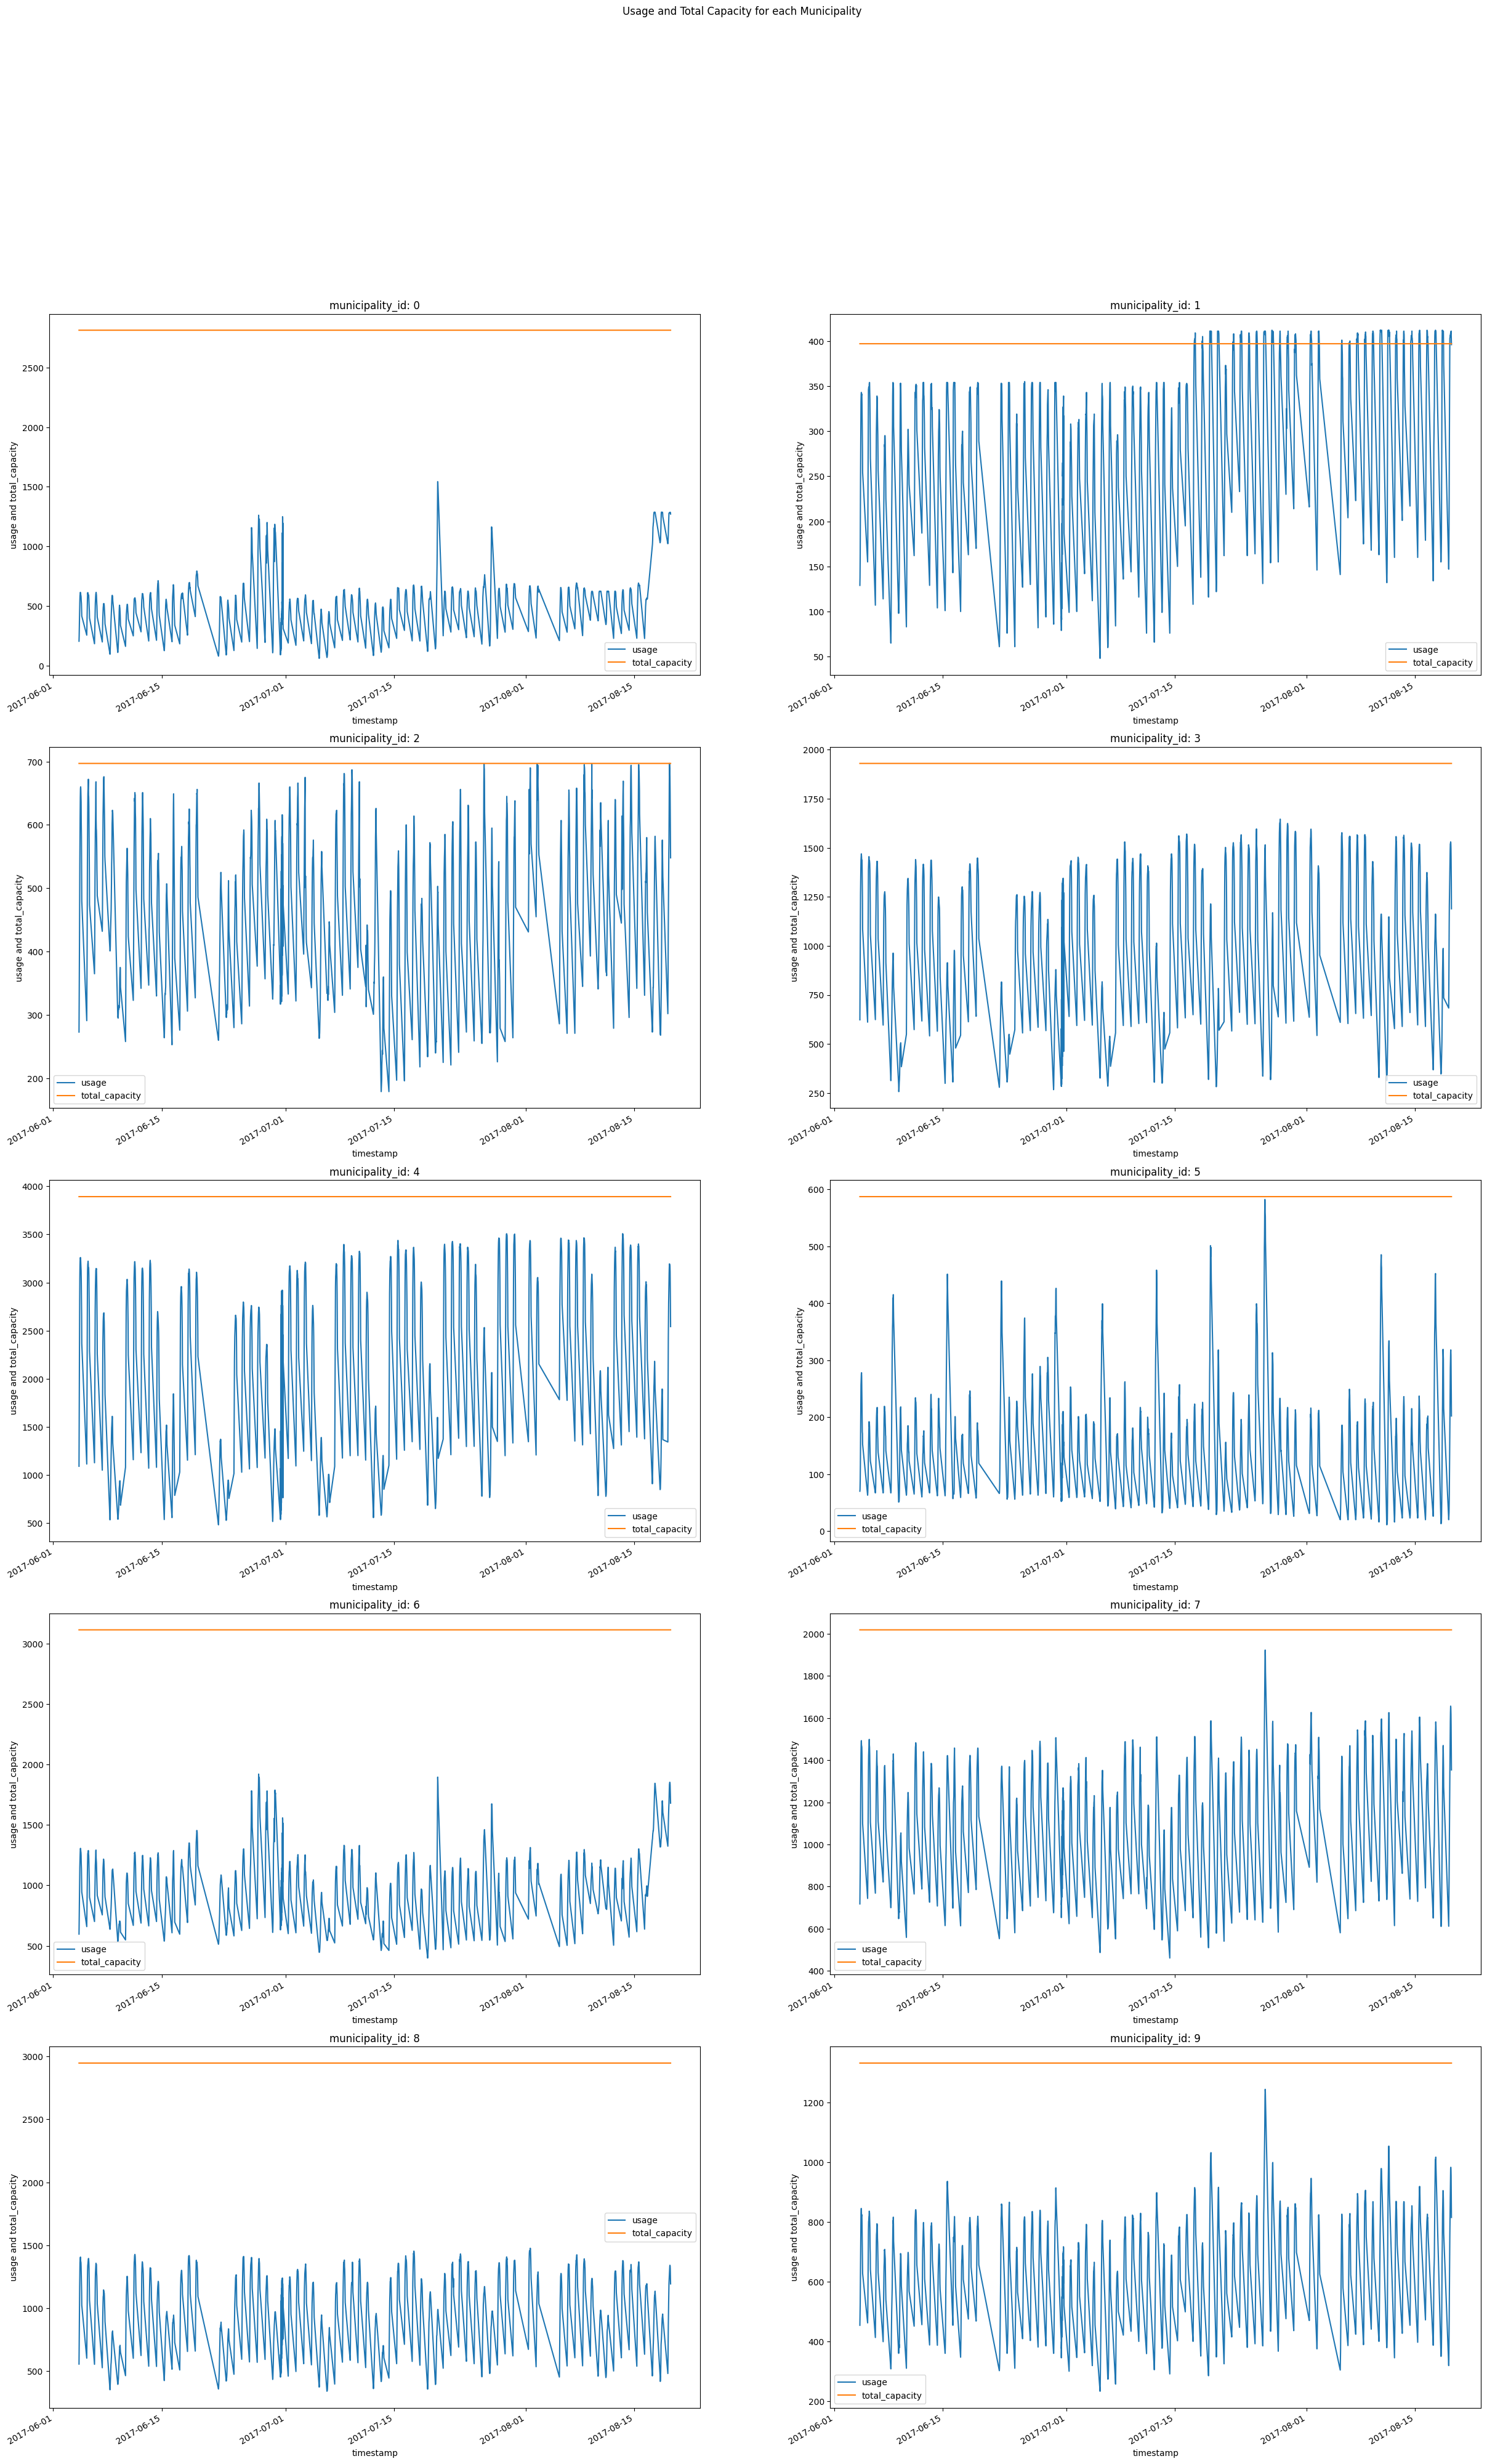

In [9]:
# plot line chart matrix of usage and total capacity due to timestamp for each municipality
fig, axes = plt.subplots(5, 2, figsize=(30, 50))
fig.suptitle("Usage and Total Capacity for each Municipality")
for i, municipality_id in enumerate(grouped_df.index):
    ax = axes[i // 2, i % 2]
    df[df['municipality_id'] == municipality_id]['usage'].plot(ax=ax, label='usage')
    df[df['municipality_id'] == municipality_id]['total_capacity'].plot(ax=ax, label='total_capacity')
    ax.set_xlabel('timestamp')
    ax.set_ylabel('usage and total_capacity')   
    ax.set_title(f"municipality_id: {municipality_id}")
    ax.legend()
plt.show()



usage  total_capacity  usage_percentage
municipality_id                                               
1                 298.071155           397.0         75.080896
2                 486.994644           697.0         69.870107
4                2306.508799          3893.0         59.247593
7                1149.288447          2019.0         56.923648
3                1078.263963          1930.0         55.868599
9                 671.293803          1332.0         50.397433
8                1021.745218          2947.0         34.670689
6                1025.820964          3113.0         32.952810
5                 171.479725           587.0         29.212900
0                 550.563122          2813.0         19.572098

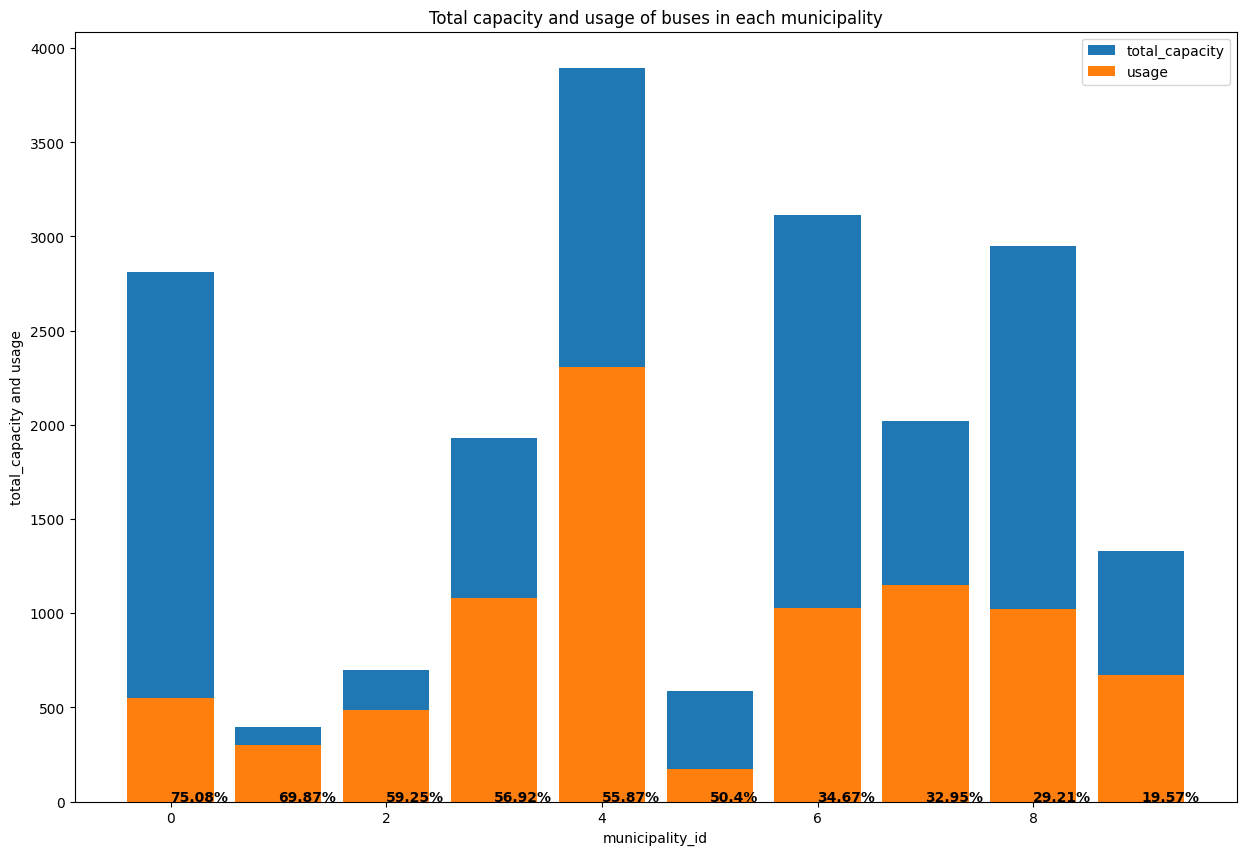

In [10]:
# group by municipality_id and aggregate the mean of usage and total_capacity. Also percentage of usage due to total capacity
usages_df = grouped_df.assign(usage_percentage=lambda x: x['usage']/x['total_capacity']*100).sort_values('usage_percentage', ascending=False)
display(usages_df)

# plot stacked chart for total_capacity and usage. Also write the percentage of usage due to total_capacity
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(usages_df.index, usages_df['total_capacity'], label='total_capacity')
ax.bar(usages_df.index, usages_df['usage'], label='usage')
ax.set_xlabel('municipality_id')
ax.set_ylabel('total_capacity and usage')
ax.set_title('Total capacity and usage of buses in each municipality')
ax.legend()
for i, v in enumerate(usages_df['usage_percentage']):
    ax.text(i, 0.5, str(round(v, 2)) + '%', color='black', fontweight='bold')
plt.show()


In [11]:
# split timestamp to year, month, day and hour, minute, second
df['date'] = pd.to_datetime(df.index.date)
df['time'] = df.index.time
df['year'] = df.index.year
df['month'] = df.index.month
df['dayOfWeek'] = df.index.dayofweek
df['day'] = df.index.day
df['hour'] = df.index.hour

df.head()

municipality_id  usage  total_capacity       date   
timestamp                                                                
2017-06-04 07:59:42                9    454            1332 2017-06-04  \
2017-06-04 07:59:42                8    556            2947 2017-06-04   
2017-06-04 07:59:42                4   1090            3893 2017-06-04   
2017-06-04 07:59:42                0    204            2813 2017-06-04   
2017-06-04 07:59:42                7    718            2019 2017-06-04   

                         time  year  month  dayOfWeek  day  hour  
timestamp                                                         
2017-06-04 07:59:42  07:59:42  2017      6          6    4     7  
2017-06-04 07:59:42  07:59:42  2017      6          6    4     7  
2017-06-04 07:59:42  07:59:42  2017      6          6    4     7  
2017-06-04 07:59:42  07:59:42  2017      6          6    4     7  
2017-06-04 07:59:42  07:59:42  2017      6          6    4     7

In [12]:
# Check missing values. due to 'There are 10 municipalities (ids from 0 to 9), and two measurements for an hour.'

check_df = df[['municipality_id', 'date', 'hour']].groupby(['municipality_id', 'date', 'hour']).size().reset_index(name='counts')
print("Count of one measurement for an hour", check_df[check_df['counts'] == 1].shape[0])
print("Count of two measurements for an hour", check_df[check_df['counts'] == 2].shape[0])
print("Count of more than two measurements for an hour", check_df[check_df['counts'] > 2].shape[0])
check_df.sort_values('counts', ascending=True)

Count of one measurement for an hour 1360
Count of two measurements for an hour 4510
Count of more than two measurements for an hour 870


municipality_id       date  hour  counts
0                   0 2017-06-04     7       1
1889                2 2017-08-06     7       1
5005                7 2017-07-06    12       1
5007                7 2017-07-06    14       1
5009                7 2017-07-06    16       1
...               ...        ...   ...     ...
5625                8 2017-06-30    13       6
2255                3 2017-06-30    13       6
1581                2 2017-06-30    13       6
4277                6 2017-06-30    13       6
2929                4 2017-06-30    13       6

[6740 rows x 4 columns]

Shape of Dataframe: (13070, 10)
Shape of Train Set: (10390, 10)
Shape of Test Set: (2680, 10)


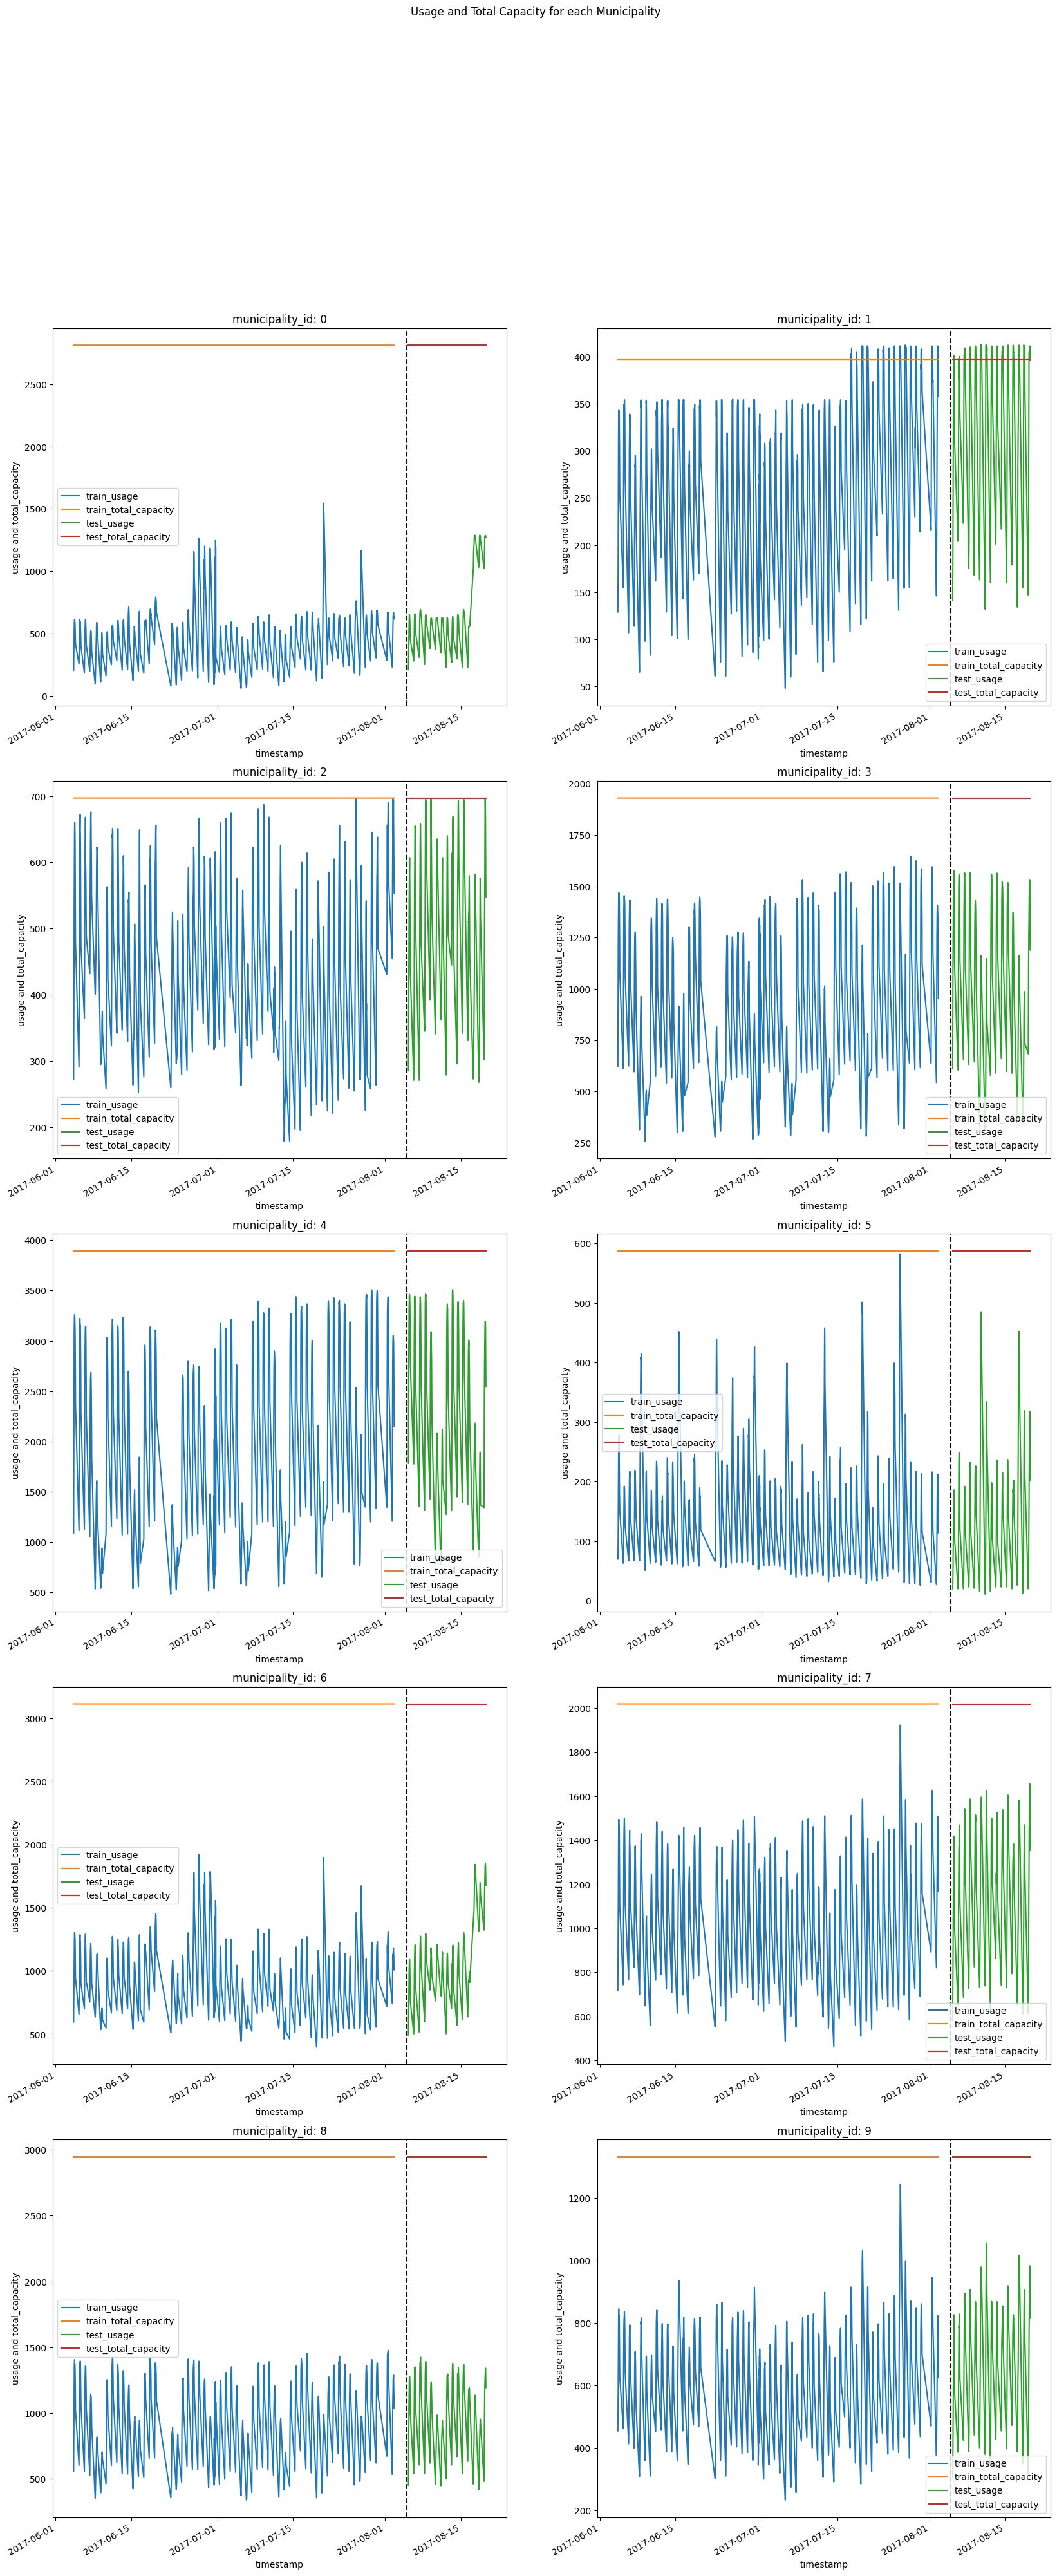

In [13]:
# split data to train and test set
horizon = pd.to_datetime("2017-08-05")

train = df.loc[df["date"] < horizon]
test = df.loc[df["date"] >= horizon]

print(f"Shape of Dataframe: {df.shape}")
print(f"Shape of Train Set: {train.shape}")
print(f"Shape of Test Set: {test.shape}")

# plot line chart matrix of usage and total capacity due to timestamp for each municipality and split train and test set
fig, axes = plt.subplots(5, 2, figsize=(20, 50))
fig.suptitle("Usage and Total Capacity for each Municipality")
for i, municipality_id in enumerate(grouped_df.index):
    ax = axes[i // 2, i % 2]
    train[train['municipality_id'] == municipality_id]['usage'].plot(ax=ax, label='train_usage')
    train[train['municipality_id'] == municipality_id]['total_capacity'].plot(ax=ax, label='train_total_capacity')
    test[test['municipality_id'] == municipality_id]['usage'].plot(ax=ax, label='test_usage')
    test[test['municipality_id'] == municipality_id]['total_capacity'].plot(ax=ax, label='test_total_capacity')
    ax.axvline(horizon, color='black', linestyle='--')
    ax.set_xlabel('timestamp')
    ax.set_ylabel('usage and total_capacity')
    ax.set_title(f"municipality_id: {municipality_id}")
    ax.legend()
plt.show()



Shape of Dataframe: (13070, 10)
Shape of Train Set: (10390, 10)
Shape of Test Set: (2680, 10)


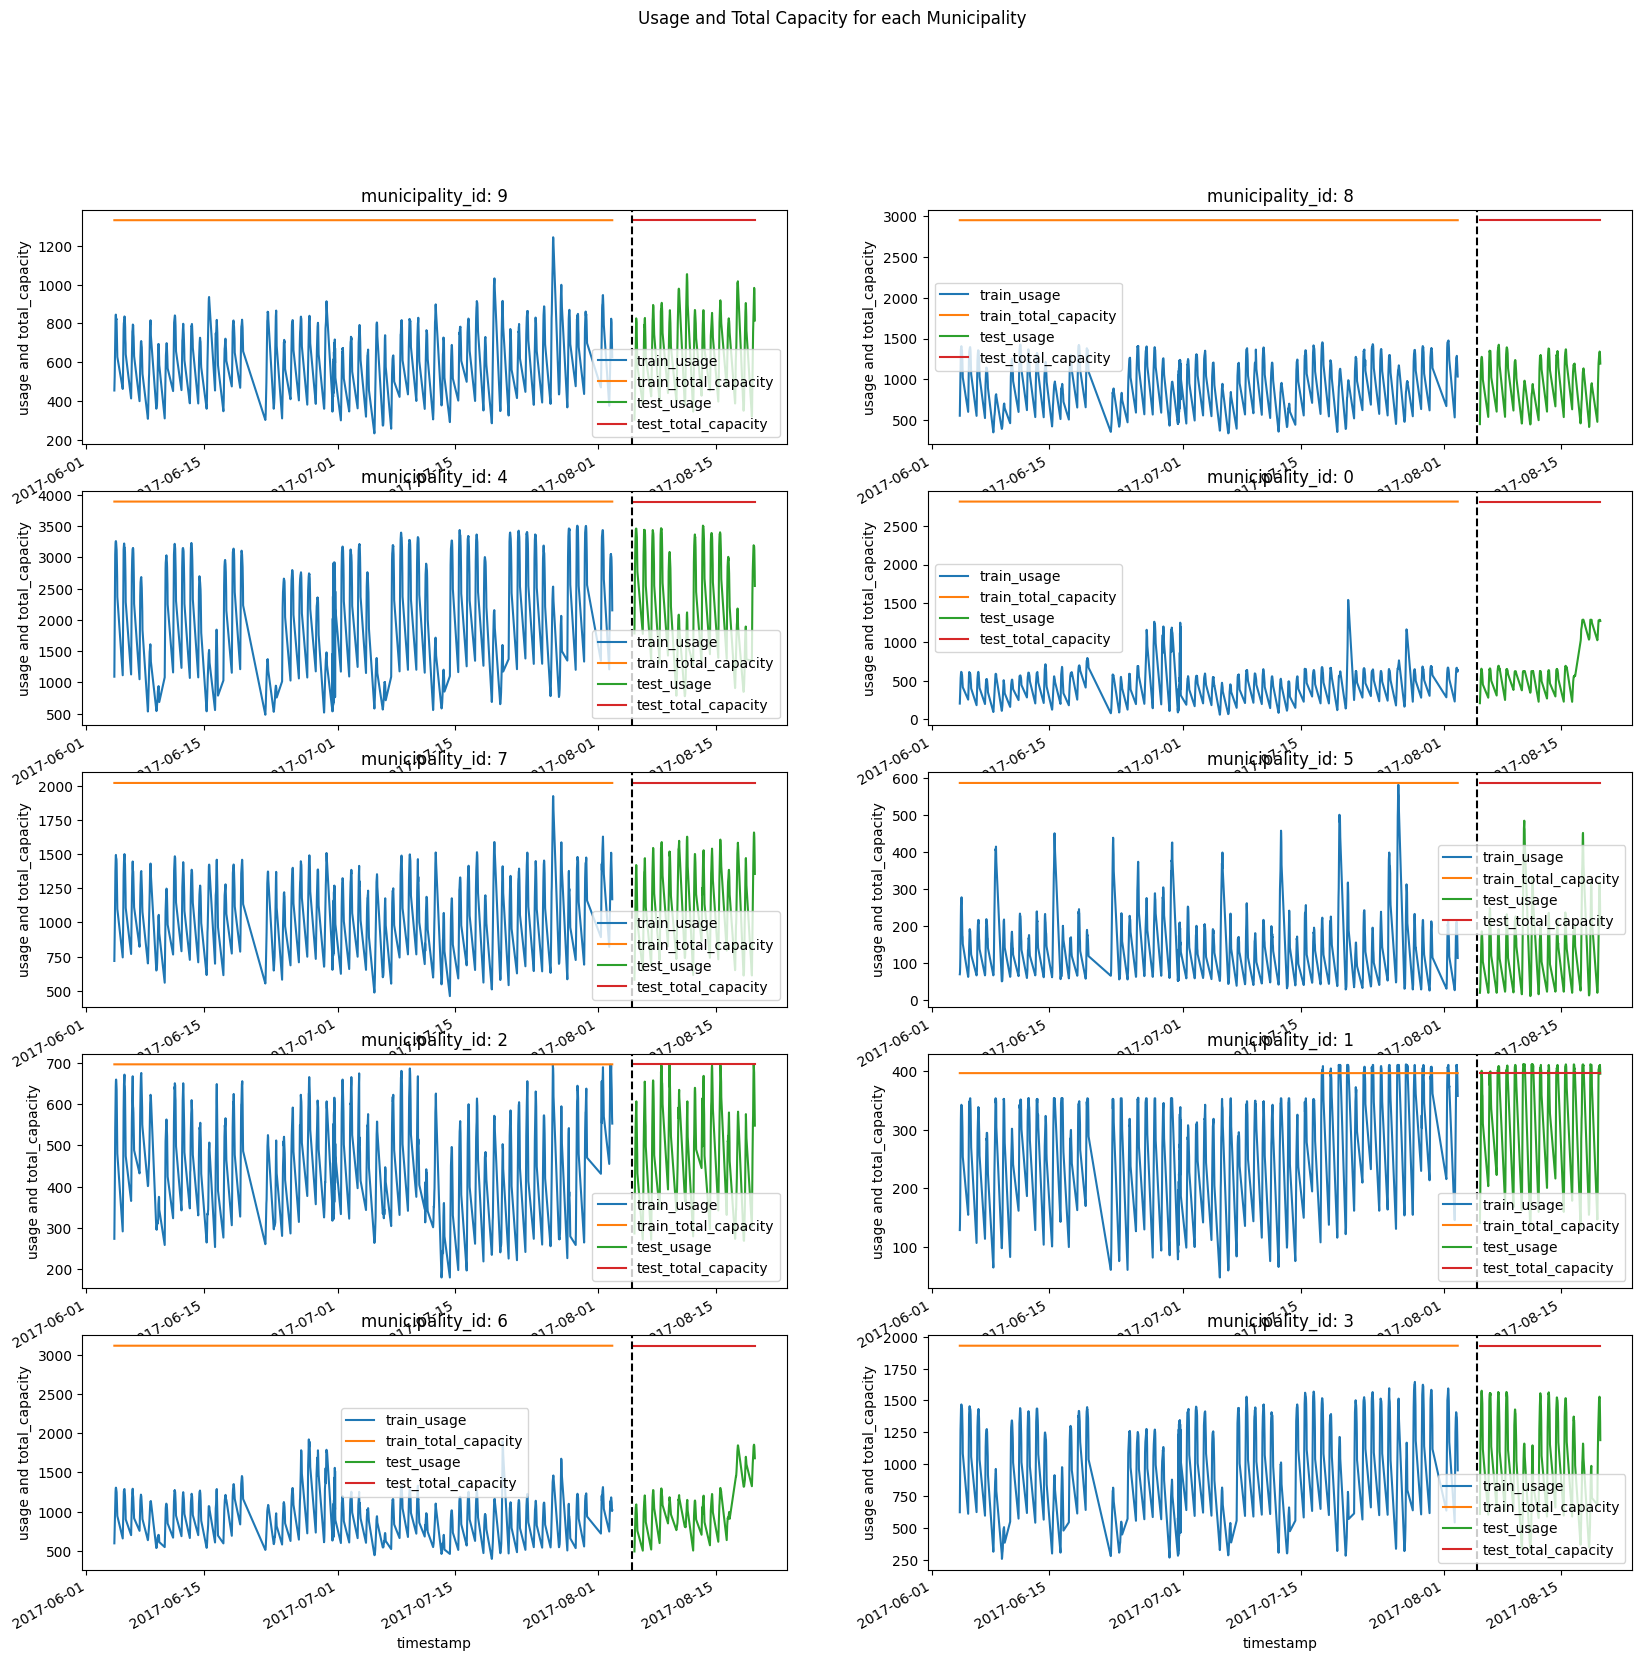

In [14]:
# split data to train and test set
horizon = pd.to_datetime("2017-08-05")

train = df.loc[df["date"] < horizon]
test = df.loc[df["date"] >= horizon]

print(f"Shape of Dataframe: {df.shape}")
print(f"Shape of Train Set: {train.shape}")
print(f"Shape of Test Set: {test.shape}")

# plot line chart matrix of usage and total capacity due to timestamp for each municipality and split train and test set
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle("Usage and Total Capacity for each Municipality")
for i, municipality_id in enumerate(df['municipality_id'].unique()):
    ax = axes[i // 2, i % 2]
    train[train['municipality_id'] == municipality_id]['usage'].plot(ax=ax, label='train_usage')
    train[train['municipality_id'] == municipality_id]['total_capacity'].plot(ax=ax, label='train_total_capacity')
    test[test['municipality_id'] == municipality_id]['usage'].plot(ax=ax, label='test_usage')
    test[test['municipality_id'] == municipality_id]['total_capacity'].plot(ax=ax, label='test_total_capacity')
    ax.axvline(horizon, color='black', linestyle='--')
    ax.set_xlabel('timestamp')
    ax.set_ylabel('usage and total_capacity')
    ax.set_title(f"municipality_id: {municipality_id}")
    ax.legend()
plt.show()

